# 1: Geographic Data

In [44]:
import pandas as pd
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
routes = pd.read_csv("routes.csv")

print(airlines.info())
print(airports.info())
print(routes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6048 entries, 0 to 6047
Data columns (total 8 columns):
id          6048 non-null int64
name        6048 non-null object
alias       5615 non-null object
iata        1461 non-null object
icao        5961 non-null object
callsign    5305 non-null object
country     6033 non-null object
active      6048 non-null object
dtypes: int64(1), object(7)
memory usage: 378.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8107 entries, 0 to 8106
Data columns (total 12 columns):
id           8107 non-null int64
name         8107 non-null object
city         8107 non-null object
country      8107 non-null object
code         5880 non-null object
icao         8043 non-null object
latitude     8107 non-null float64
longitude    8107 non-null float64
altitude     8107 non-null int64
offset       8107 non-null float64
dst          8107 non-null object
timezone     8107 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 760.

# 2: Geographic Coordinate Systems

![Geographic Coordinate System](./latitude_longitude.png)
Latitude and longitude values describe points on a sphere, which is three-dimensional. To plot the values on a two-dimensional plane, we need to convert the coordinates to the Cartesian coordinate system using a **map projection**.

A map projection transforms points on a sphere to a two-dimensional plane. When projecting down to the two-dimensional plane, some properties are distorted. Each map projection makes trade-offs in what properties to preserve and you can read about the different trade-offs [here](https://en.wikipedia.org/wiki/Map_projection#Metric_properties_of_maps).
We'll use the [Mercator projection](https://en.wikipedia.org/wiki/Mercator_projection), because it is commonly used by popular mapping software.



# 3: Installing Basemap
The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python. Basemap does not do any plotting on it’s own, but provides the facilities to transform coordinates to one of 25 different map projections.


Basemap makes it easy to convert from the spherical coordinate system (latitudes & longitudes) to the Mercator projection. While basemap uses Matplotlib to actually draw and control the map, the library provides many methods that enable us to work with maps quickly.

[To solve the conflict between Python 3.5 and basemap, refer to this.](http://stackoverflow.com/questions/35716830/basemap-with-python-3-5-anaconda-on-windows)

In [45]:
from mpl_toolkits.basemap import Basemap

# 4: Workflow With Basemap
Here's what the general workflow will look like when working with two-dimensional maps:

* Create a new basemap instance with the specific map projection we want to use and how much of the map we want included.
* Convert spherical coordinates to Cartesian coordinates using the basemap instance.
* Use the matplotlib and basemap methods to customize the map.
* Display the map.

In [46]:
# Call the basemap constructor and pass in values for the required parameters
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)

#projection: the map projection.
#llcrnrlat: latitude of lower left hand corner of the desired map domain
#urcrnrlat: latitude of upper right hand corner of the desired map domain
#llcrnrlon: longitude of lower left hand corner of the desired map domain
#urcrnrlon: longitude of upper right hand corner of the desired map domain

# 5: Converting From Spherical To Cartesian Coordinates

In [47]:
longitudes = airports['longitude'].tolist()
latitudes = airports['latitude'].tolist()
x, y = m(longitudes, latitudes)

# 6: Generating a Scatter Plot

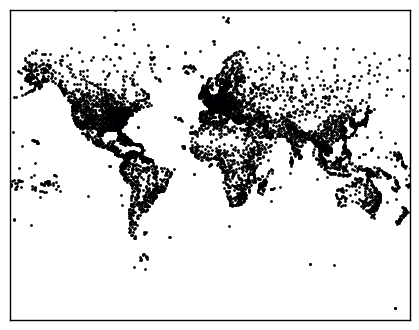

In [48]:
import matplotlib.pyplot as plt
m.scatter(x, y, s=1)
plt.show()

# 7: Customizing The Plot Using Basemap

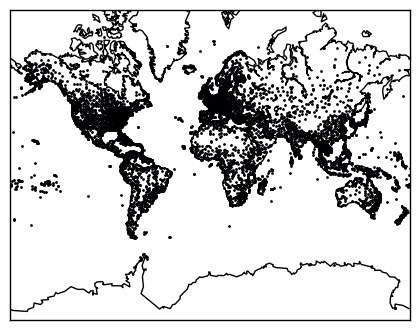

In [49]:
m.drawcoastlines()
m.scatter(x, y, s=1)
plt.show()

# 8: Customizing The Plot Using Matplotlib

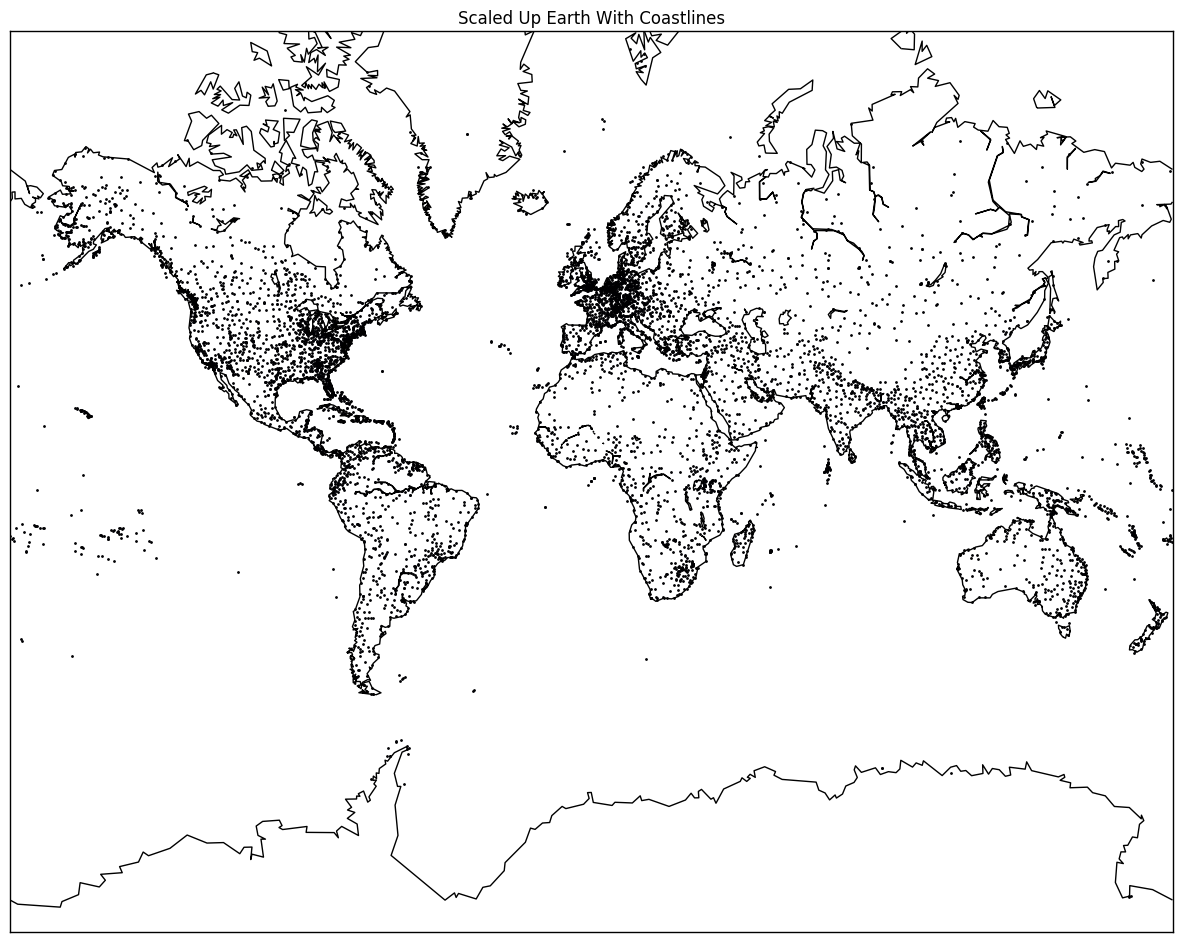

In [50]:
fig, ax = plt.subplots(figsize=(15, 20))
ax.set_title("Scaled Up Earth With Coastlines")
m.scatter(x, y, s=1)
m.drawcoastlines()
plt.show()

# 9: Introduction To Great Circles
A great circle is the shortest circle connecting 2 points on a sphere.

In [51]:
airports = airports.set_index('code')
routes = routes.join(airports, on='source')

In [58]:
geo_routes = routes[['airline', 'source', 'dest', 'equipment']]
geo_routes.loc[:, ('start_lon')] = routes.loc[:, ('longitude')]
geo_routes['start_lat'] = routes['latitude']

C:\Users\eyaneri\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\eyaneri\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\eyaneri\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [59]:
geo_routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67663 entries, 0 to 67662
Data columns (total 6 columns):
airline      67663 non-null object
source       67663 non-null object
dest         67663 non-null object
equipment    67645 non-null object
start_lon    67428 non-null float64
start_lat    67428 non-null float64
dtypes: float64(2), object(4)
memory usage: 3.1+ MB


In [60]:
geo_routes = geo_routes.join(airports, on='dest')

In [62]:
geo_routes['end_lon'] = geo_routes['longitude']
geo_routes['end_lat'] = geo_routes['latitude']

In [63]:
geo_routes = geo_routes[['airline', 'source', 'dest', 'equipment', 'start_lon', 'end_lon', 'start_lat', 'end_lat']]

In [64]:
geo_routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67663 entries, 0 to 67662
Data columns (total 8 columns):
airline      67663 non-null object
source       67663 non-null object
dest         67663 non-null object
equipment    67645 non-null object
start_lon    67428 non-null float64
end_lon      67425 non-null float64
start_lat    67428 non-null float64
end_lat      67425 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB


In [67]:
geo_routes = geo_routes.dropna()

In [68]:
geo_routes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67192 entries, 0 to 67662
Data columns (total 8 columns):
airline      67192 non-null object
source       67192 non-null object
dest         67192 non-null object
equipment    67192 non-null object
start_lon    67192 non-null float64
end_lon      67192 non-null float64
start_lat    67192 non-null float64
end_lat      67192 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.6+ MB


# 10: Displaying Great Circles
We use the basemap.drawgreatcircle() method to display a great circle between 2 points. The basemap.drawgreatcircle() method requires four parameters in the following order:

* lon1 - longitude of the starting point.
* lat1 - latitude of the starting point.
* lon2 - longitude of the ending point.
* lat2 - latitude of the ending point.

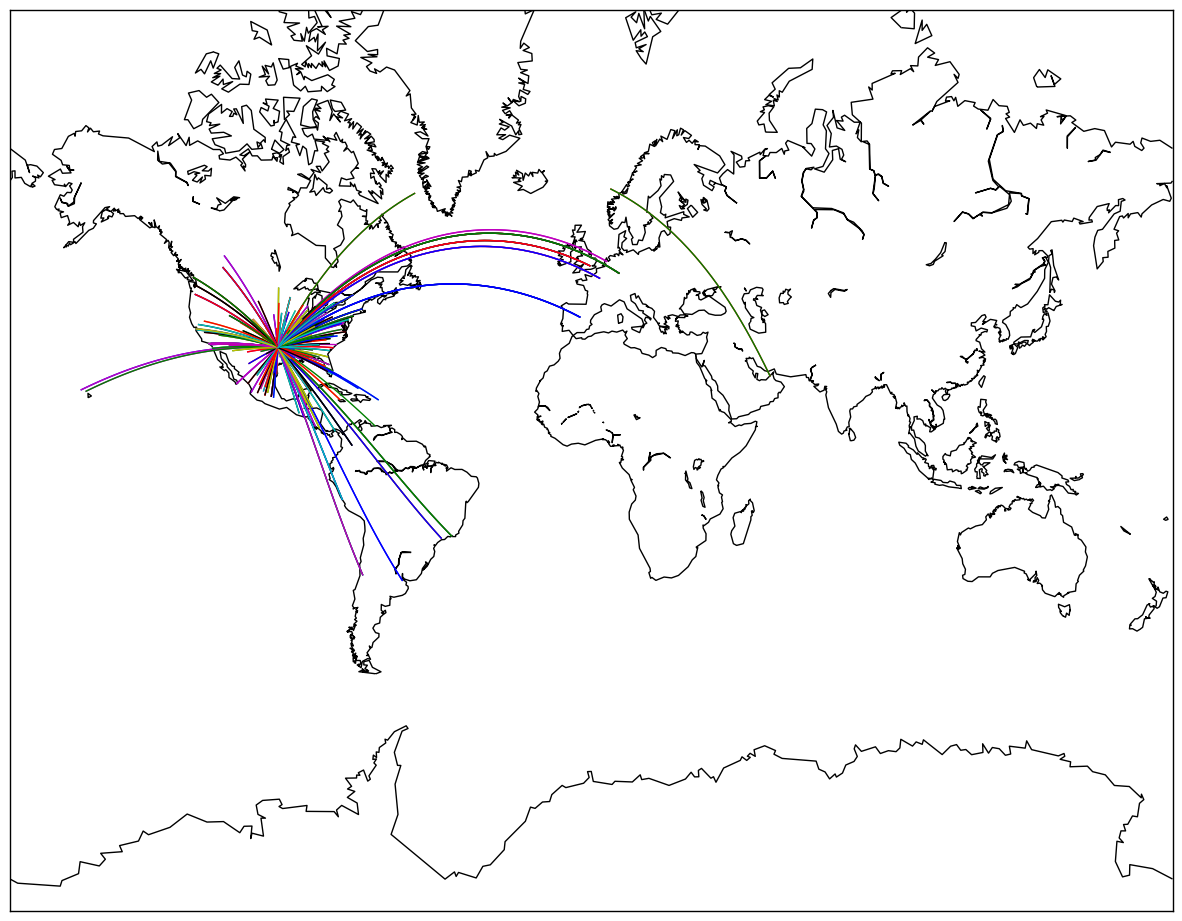

In [73]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

def create_great_circles(df):
    for index, row in df.iterrows():
        end_lat, start_lat = row['end_lat'], row['start_lat']
        end_lon, start_lon = row['end_lon'], row['start_lon']
        if abs(end_lat - start_lat) < 180:
            if abs(end_lon - start_lon) < 180:
                m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)

    
dfw = geo_routes[geo_routes['source'] == "DFW"]
create_great_circles(dfw)
plt.show()

# 11: Conclusion
In this mission, we learned how to visualize geographic data using basemap. This is the last mission in the Storytelling Through Data Visualization course. You should now have a solid foundation in data visualization for exploring data and communicating insights. We encourage you to keep exploring data visualization on your own. Here are some suggestions for what to do next:

* Plotting tools:
  * [Creating 3D plots using Plotly](https://plot.ly/python/3d-scatter-plots/)
  * [Creating interactive visualizations using bokeh](http://bokeh.pydata.org/en/latest/)
  * [Creating interactive map visualizations using folium](https://folium.readthedocs.io/en/latest/)
* The art and science of data visualization:
  * [Visual Display of Quantitative Information](https://www.amazon.com/Visual-Display-Quantitative-Information/dp/0961392142)
  * [Visual Explanations: Images and Quantities, Evidence and Narrative](https://www.amazon.com/Visual-Explanations-Quantities-Evidence-Narrative/dp/0961392126)